In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import seaborn as sns
import sklearn.tree as tree
import sklearn.metrics as mt
import matplotlib.colors as mcolors


ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv("/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [4]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [5]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


DATA CLEANING

In [6]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [7]:
df.duplicated().sum()

14

In [8]:
df = df.ffill()

In [9]:
df.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       1
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

In [10]:
df.dropna()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,Dry,Truck,49.0,43.0,Artificial Light,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,2.0,30.0,4.0,1.0,High,Dry,Car,52.0,34.0,Artificial Light,1.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [11]:
df = df.drop_duplicates()

EDA

In [12]:
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Weather: ['Rainy' 'Clear' 'Foggy' 'Stormy' 'Snowy']
Unique values in Road_Type: ['City Road' 'Rural Road' 'Highway' 'Mountain Road']
Unique values in Time_of_Day: ['Morning' 'Night' 'Evening' 'Afternoon']
Unique values in Accident_Severity: [nan 'Moderate' 'Low' 'High']
Unique values in Road_Condition: ['Wet' 'Icy' 'Under Construction' 'Dry']
Unique values in Vehicle_Type: ['Car' 'Truck' 'Bus' 'Motorcycle']
Unique values in Road_Light_Condition: ['Artificial Light' 'Daylight' 'No Light']


In [13]:
x_speed = df["Weather"]
y_speed = df["Traffic_Density"]

In [14]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,2.0,30.0,4.0,1.0,High,Dry,Car,52.0,34.0,Artificial Light,1.0
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [15]:
df2 = df[df["Accident"] == 1.0]

In [16]:
df2

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
11,Clear,Mountain Road,Night,2.0,100.0,5.0,0.0,Low,Dry,Motorcycle,47.0,38.0,Artificial Light,1.0
13,Rainy,City Road,Night,0.0,30.0,1.0,1.0,Moderate,Dry,Motorcycle,67.0,63.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,Rainy,Highway,Night,1.0,60.0,5.0,0.0,Moderate,Dry,Car,27.0,22.0,Artificial Light,1.0
821,Stormy,City Road,Afternoon,0.0,80.0,1.0,0.0,Moderate,Icy,Car,57.0,48.0,Artificial Light,1.0
830,Clear,Highway,Morning,1.0,100.0,2.0,0.0,Moderate,Wet,Car,56.0,48.0,Artificial Light,1.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0


In [17]:
df['Vehicle_Type'].count()

825

In [18]:


Car = df2['Vehicle_Type'].value_counts().get('Car', 0)
Bus = df2['Vehicle_Type'].value_counts().get('Bus', 0)
Truck = df2['Vehicle_Type'].value_counts().get('Truck', 0)
Motorcycle = df2['Vehicle_Type'].value_counts().get('Motorcycle', 0)

list_of_items  = [Car,Bus,Truck,Motorcycle]
list_of_names  = ['Car','Bus','Truck','Motorcycle']
i = 0
while i < 4:
    print(f"now we know that the object {list_of_names[i]} have {list_of_items[i]} total in the data")
    i = i + 1


now we know that the object Car have 174 total in the data
now we know that the object Bus have 8 total in the data
now we know that the object Truck have 34 total in the data
now we know that the object Motorcycle have 27 total in the data


In [19]:
total = df2['Vehicle_Type'].count()

In [20]:
persantge_of_viechles = []

for i in list_of_items:
    persantage = (i/total) * 100
    persantge_of_viechles.append(round(persantage))
    print(f"{round(persantage)}%")


print(persantge_of_viechles)

72%
3%
14%
11%
[72, 3, 14, 11]


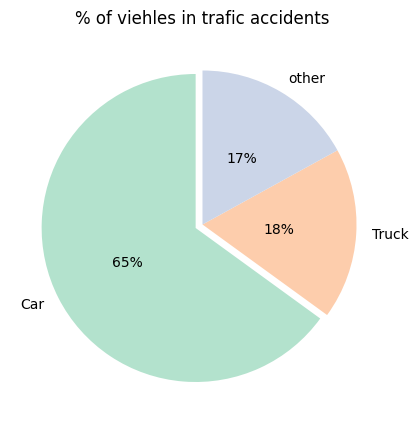

In [21]:
e = [0.05,0,0]
new_data_piechart = [65,18,17]
list_of_names2 = ['Car','Truck','other']
plt.figure(figsize = (5,5))
plt.pie(new_data_piechart,labels = list_of_names2,colors=plt.cm.Pastel2.colors, autopct='%1.0f%%', pctdistance=0.5,explode=e,startangle=90)

plt.title("% of viehles in trafic accidents")
plt.show()

Decision trees

In [22]:
df["Weather"] = df["Weather"].map({"Clear":0,"Rainy":1,"Foggy":2,"Stormy":3,"Snowy":4})
df["Road_Type"] = df["Road_Type"].map({"Highway":0,"City Road":1,"Mountain Road":2,"Rural Road":3})
df["Time_of_Day"] = df["Time_of_Day"].map({"Evening":"0","Afternoon":"1","Morning":"2","Night":"3"})
df["Accident_Severity"] = df["Accident_Severity"].map({'Low':"0",'High':"2",'Moderate':"1"})
df["Road_Condition"] = df["Road_Condition"].map({"Icy": "0", "Under Construction": "1", "Dry": "2", "Wet": "3"})
df["Vehicle_Type"] = df["Vehicle_Type"].map({"Car": "0", "Bus": "1", "Truck": "2", "Motorcycle": "3"})
df["Road_Light_Condition"] = df["Road_Light_Condition"].map({"Artificial Light": "0", "Daylight": "1", "No Light": "2"})



In [23]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,1,1,2,1.0,100.0,5.0,0.0,NaN,3,0,51.0,48.0,0,0.0
1,0,3,3,1.0,120.0,3.0,0.0,1,3,2,49.0,43.0,0,0.0
2,1,0,0,1.0,60.0,4.0,0.0,0,0,0,54.0,52.0,0,0.0
3,0,1,1,2.0,60.0,3.0,0.0,0,1,1,34.0,31.0,1,0.0
4,1,0,2,1.0,195.0,11.0,0.0,0,2,0,62.0,55.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,3,2.0,30.0,4.0,0.0,0,2,0,23.0,15.0,1,0.0
836,1,3,0,2.0,60.0,4.0,0.0,0,2,3,52.0,46.0,1,1.0
837,2,0,0,2.0,30.0,4.0,1.0,2,2,0,52.0,34.0,0,1.0
838,2,0,1,2.0,60.0,3.0,0.0,0,2,0,25.0,19.0,0,0.0


In [33]:
accident_happend = df.loc[(df["Accident"] == 1)]

display(accident_happend)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
4,1,0,2,1.0,195.0,11.0,0.0,0,2,0,62.0,55.0,0,1.0
6,2,0,1,0.0,60.0,4.0,0.0,0,2,2,27.0,26.0,1,1.0
7,1,1,1,0.0,60.0,4.0,0.0,0,2,0,29.0,22.0,0,1.0
11,0,2,3,2.0,100.0,5.0,0.0,0,2,3,47.0,38.0,0,1.0
13,1,1,3,0.0,30.0,1.0,1.0,1,2,3,67.0,63.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,0,3,1.0,60.0,5.0,0.0,1,2,0,27.0,22.0,0,1.0
821,3,1,1,0.0,80.0,1.0,0.0,1,0,0,57.0,48.0,0,1.0
830,0,0,2,1.0,100.0,2.0,0.0,1,3,0,56.0,48.0,0,1.0
836,1,3,0,2.0,60.0,4.0,0.0,0,2,3,52.0,46.0,1,1.0


In [40]:
normalizedData = (accident_happend["Weather"]-np.min(accident_happend["Weather"]))/(np.max(accident_happend["Weather"])-(np.min(accident_happend["Weather"])))
  
print(normalizedData) 

4      0.25
6      0.50
7      0.25
11     0.00
13     0.25
       ... 
817    0.25
821    0.75
830    0.00
836    0.25
837    0.50
Name: Weather, Length: 243, dtype: float64


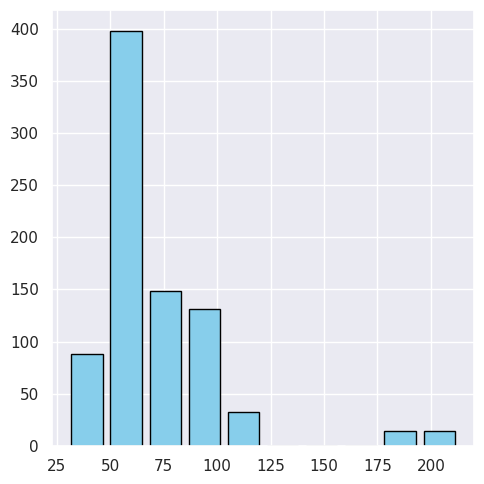

In [48]:


plt.figure(figsize = (5,5))
plt.hist(df["Speed_Limit"],color='skyblue', edgecolor='black', rwidth=0.8)

plt.tight_layout()
plt.show()

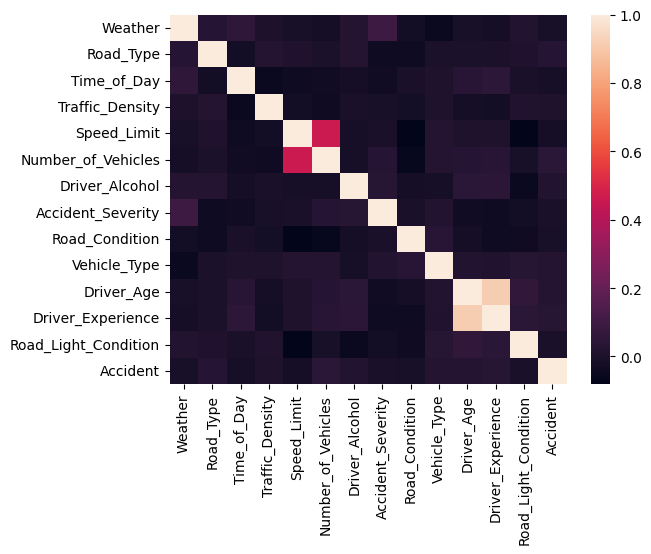

In [25]:
sns.heatmap(df.corr() )
sns.set(rc = {'figure.figsize':(10,10)})#<--responsible for changing the size of a seaborn plot
plt.show()

In [26]:
top_corr = df.corr()["Accident"].sort_values(ascending = False)
top_corr

Accident                1.000000
Number_of_Vehicles      0.041257
Driver_Experience       0.030126
Road_Type               0.024851
Vehicle_Type            0.023414
Driver_Age              0.021702
Driver_Alcohol          0.018246
Traffic_Density         0.003779
Road_Light_Condition   -0.005350
Accident_Severity      -0.009014
Road_Condition         -0.011391
Weather                -0.012326
Time_of_Day            -0.016770
Speed_Limit            -0.019790
Name: Accident, dtype: float64

In [27]:


model = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 5)
x = df[["Number_of_Vehicles", "Vehicle_Type", "Driver_Age", "Driver_Experience", "Speed_Limit", "Road_Type", "Road_Condition"]]
y = df[["Accident"]]

In [28]:
X_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size = 0.2,random_state = 0)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
score1 = mt.accuracy_score(y_test,y_pred)
score1

0.7575757575757576

In [31]:
score2 = model.predict([[1,2,3,1,3,2,1]])
score2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])